## 밑바닥부터 시작하는 딥러닝(Deep Learning from Scratch) 챕터별 예제코드 정리 
예제코드가 기본이나 정확히 일치하지는 않습니다. 개인적으로 모든 코드들을 문서화하되 너무 기본적인 내용은 제외하거나 나름대로 더 필요하다고 생각되는 내용은 추가하였습니다. 같은 내용을 다른 방식으로 구현하는 경우도 있습니다.
## Chapter 6. 학습 관련 기술들
### 6.3 Batch normalization
간략하게 설명하면 각 층에 hidden node의 값이 어느 한 쪽에 치우치지않게 강제로 퍼뜨리는 방법으로 이론적으로는 internal covariate shift 문제와 관련이 있다. Batch normalization이 주목 받는 이유는 아래의 세 가지 이유이다.  
    1. 학습을 빨리 진행할 수 있다.(학습속도개선)
    2. Weight의 초기값에 크게 의존하지 않는다
    3. Overfitting을 방지(Dropout 등의 필요성 감소)  
Batch normalization은 학습 시 mini-batch 단위로 정규화를 하며 구체적으로는 pre-activation 또는 activation의 분포가 평균이 0, 분산이 1이 되도록 정규화 한다. 실제로는 대부분 pre-activation에 적용하는 것을 확인하였으며 Batch normalization의 수식은 아래와 같다.  

$$\mu_B \leftarrow {1 \over m} \sum\limits_{i=1}^{m} {x_i}$$  

$${\sigma_B}^2 \leftarrow {1 \over m} \sum\limits_{i=1}^{m} {(x_i - \mu_B)}^2$$  

$$\hat{x_i} \leftarrow {{x_i - \mu} \over {\sqrt{{\mu_B}^2 + \epsilon}}}$$  

$$y_i \leftarrow \gamma \hat{x_i} + \beta$$  


상세한 내용은 아래의 논문을 참고하며 최근에 나온 논문인 "Batch renormalization"을 읽어보고 적용하면 좋을 듯 하다.  

Batch normalization : https://arxiv.org/pdf/1502.03167.pdf  
Batch renormalization : https://arxiv.org/pdf/1702.03275.pdf

### Load modules & library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
os.chdir('C:\\Users\\KBS\\PycharmProjects\\Deep_learning_scratch') # 아래의 module들이 있는 directory 설정
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

### Experiment settings

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

### Define function for Experiment

In [3]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                  weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

          #  print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list

### Visualization
아래의 그림에서 대부분의 경우에 Batch normalization을 적용한 경우가 학습이 잘 된 것을 확인할 수가 있다. 특이한 것은 Weight initialization의 표준편차를 적게줘서 학습할 경우, hidden node의 값이 잘 분포되지 않기 때문에 학습이 안 되지만 해당 경우에 Batch normalization을 적용했을 경우에는 학습을 할 수 있음을 확인할 수가 있다.

============== 1/16 ==============


C:\Users\KBS\PycharmProjects\Deep_learning_scratch\common\functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
C:\Users\KBS\PycharmProjects\Deep_learning_scratch\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\KBS\PycharmProjects\Deep_learning_scratch\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\KBS\PycharmProjects\Deep_learning_scratch\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\Users\KBS\PycharmProjects\Deep_learning

============== 2/16 ==============
============== 3/16 ==============
============== 4/16 ==============
============== 5/16 ==============
============== 6/16 ==============
============== 7/16 ==============
============== 8/16 ==============
============== 9/16 ==============
============== 10/16 ==============
============== 11/16 ==============
============== 12/16 ==============
============== 13/16 ==============
============== 14/16 ==============
============== 15/16 ==============
============== 16/16 ==============


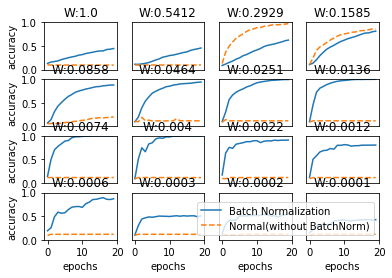

In [4]:
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print("============== " + str(i + 1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4, 4, i + 1)
    plt.title("W:" + str(round(w,4)))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()